# Introduction to machine learning

*Maxime Sangnier*

Fall, 2019

## Practical session 1: discriminant analysis, logistic regression and boosting

# Table of contents
1. [Discriminant analysis](#part1)
    - [Linear discriminant analysis](#part1sec1)
    - [Quadratic discriminant analysis](#part1sec2)
    - [Fisher discriminant analysis](#part1sec3)
1. [Logistic regression](#part2)
1. [Adaboost](#part3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Discriminant analysis <a id="part1"></a>
## Linear discriminant analysis <a id="part1sec1"></a>
>Write a function that generates a multivariate Gaussian sample of mean $\mu$, covariance defined by $(\sigma_1, \sigma_2, \theta)$ and size $n$.
The corresponding numpy array should be of size $(n, 2)$.


>Compute the mean and the empirical covariance of the sample using Numpy routines.

In [2]:
# Avant avoir lu l'énoncé
def mk_class(n_points, mu, cov_mat):
    return np.random.multivariate_normal(mu, cov_mat, n_points)
def mk_covmat(d):
    A = np.random.uniform(-5, 5, (d, d))
    return np.dot(A, A.transpose())

# By hand
def compute_cov(c1, c2):
    mu1 = np.mean(c1, axis=0)
    mu2 = np.mean(c2, axis=0)

    delta1 = lambda c: mu1 - c
    delta2 = lambda c: mu2 - c

    cov = sum(np.outer(delta1(c), delta2(c).transpose()) for c in c1) / c1.shape[0] + sum(
        np.outer(delta2(c), delta2(c).transpose()) for c in c2) / c2.shape[0]
    
    return mu1, mu2, cov

# Using numpy routine

def compute_cov_np(c1, c2):
    mu1 = np.mean(c1, axis=0)
    mu2 = np.mean(c2, axis=0)
    
    cov_1 = np.cov(c1)* (c1.shape[0]) / (c1.shape[0]+c2.shape[0])
    cov_2 = np.cov(c2)* (c2.shape[0]) / (c1.shape[0]+c2.shape[0])
    
    cov = cov_1 + cov_2
    
    return mu1, mu2, cov
                                   
    

>Generate two multivariate Gaussian samples of size $n_1 = n_2 = 50$ with different means and equal covariance matrices.
Plot both samples with different markers.

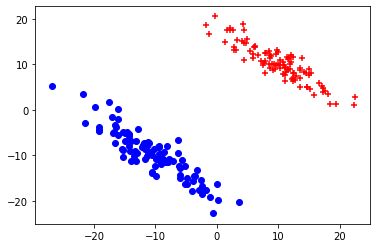

In [3]:
S = mk_covmat(2)
X_1 = mk_class(100, [10,10], S)
X_2 = mk_class(100, [-10,-10], S)


plt.scatter(X_1[:, 0], X_1[:, 1], marker="+", c="red" )
plt.scatter(X_2[:, 0], X_2[:, 1], marker="o", c="blue")

>Based on the following code, implement a linear discriminant classifier, taking as parameters an $n \times 2$ Numpy array as data and a size-$n$ array of labels.

In [4]:
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

class LDA(BaseEstimator, LinearClassifierMixin):
    """
        LDA classifier for two classes.
    """
    def __init__(self, prior=None):
        """
            prior: wether to use prior in the intercept. Default is false.
        """
        self.prior = prior
        
    def fit(self, X, y):
        c1 = np.array([x for i,x in enumerate(X) if y[i] == 1])
        c2 = np.array([x for i,x in enumerate(X) if y[i] == 0])
        
        self.linear_sep, self.mu1, self.mu2, self.cov, self.h, self.b = compute_linear_sep(c1,c2)
        
    def decision_function(self, X):
        return np.array([self.linear_sep(x) for x in X])

    def predict(self, X):
        return self.decision_function(X) >= 0
    
def compute_linear_sep(c1, c2):
    mu1, mu2, cov = compute_cov(c1, c2)

    inv_conv = np.linalg.inv(cov)

    h = np.dot((mu1 - mu2).transpose(), inv_conv)

    P1 = - np.dot(np.dot(mu1.transpose(), inv_conv), mu1)
    P2 = np.dot(np.dot(mu2.transpose(), inv_conv), mu2)
    b = (1 / 2) * (P1 + P2) + 0

    def linear_sep(x):
        return np.dot(h, x) + b

    return linear_sep, mu1, mu2, cov, h, b

In [5]:
# Answer

X = np.concatenate([X_1, X_2])
y = np.array([1 for i in range(100)]+[0 for i in range(100)])

lda = LDA()
lda.fit(X, y)

preds = lda.predict(X)

predX_1 = np.array([x for i,x in enumerate(X) if preds[i]])
predX_2 = np.array([x for i,x in enumerate(X) if not preds[i]])

In [6]:
def plot_line(h, b):
    T = np.linspace(-10,10,100)
    y =  np.array([t*h + b for t in T])
    
    return y

>Create the Numpy arrays `X` and `y` based on the samples generated previously and fit a linear discriminant classifier.
Plot the data along with the classifier frontiere. 

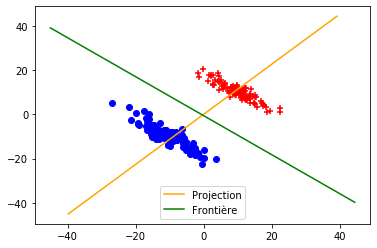

In [15]:
# Answer
plt.scatter(predX_1[:, 0], predX_1[:, 1], marker="+", c="red" )
plt.scatter(predX_2[:, 0], predX_2[:, 1], marker="o", c="blue")

y = plot_line(lda.h, lda.b)

plt.plot(y[:,0], y[:, 1], c="orange", label="Projection")

y = plot_line(np.array([lda.h[1], -lda.h[0]]), lda.b)

plt.plot(y[:,0], y[:, 1], c="green", label="Frontière")

plt.legend()


>Compare the result of [scikit-learn LDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) (decision function and frontiere).

In [8]:
# Answer
# Flemme

## Quadratic discriminant analysis <a id="part1sec2"></a>
>Analyze the behavior of LDA and [QDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis) when it is faced to anisotropic Gaussian samples (in particular, check if the frontiere is the bisector of the line segment for which the extremities are both class centers), and then to Gaussian samples with different covariance matrices.

In [9]:
# Answer

## Fisher discriminant analysis <a id="part1sec3"></a>
>Implement the Fisher discriminant analysis based on the following code.
In practice, what is the difference between LDA and FisherDA?

In [10]:
class FisherDA(BaseEstimator, LinearClassifierMixin):
    """
        Fisher discriminant analysis for two classes.
    """
    def fit(self, X, y):
        pass

    def decision_function(self, X):
        pass

    def predict(self, X):
        pass

In [11]:
# Answer

# Logistic regression <a id="part2"></a>
>We consider that $X|Y=1 \sim \mathcal N(0, I)$ and $X|Y=-1 \sim 0.5 \mathcal N\left(\begin{pmatrix} 5 \\ 3 \end{pmatrix}, I\right) + 0.5 \mathcal N\left(\begin{pmatrix} 8 \\ 9 \end{pmatrix}, I\right)$ (non-Gaussian class).
Compare LDA and [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [12]:
# Answer

>What about with this dataset (class $-1$ is Gaussian but with an outlier)?

In [13]:
# Dataset
X1 = gaussian_sample(mu=[0, 0])
X2 = gaussian_sample(mu=[5, 3], n=49)
X3 = gaussian_sample(mu=[20, 20], n=1).reshape(1, -1)

X = np.r_[X1, X2, X3]
Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0]), -np.ones(X3.shape[0])]

NameError: name 'gaussian_sample' is not defined

In [ ]:
# Answer

# Adaboost <a id="part3"></a>
>We consider the dataset defined below.

In [ ]:
# Dataset
X1 = gaussian_sample(mu=[0, 0], sigma1=10, theta=np.pi/6)
X2 = gaussian_sample(mu=[5, 3], sigma1=3, sigma2=10, theta=np.pi/6, n=50)
X3 = gaussian_sample(mu=[-5, -2], sigma1=3, sigma2=10, theta=np.pi/10, n=50)

X = np.r_[X1, X2, X3]
Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0]), -np.ones(X3.shape[0])]

>Fit an [Adaboost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) classifier with $100$ weak learners and the algorithm SAMME.
Map the classifier regions on a figure.

In [ ]:
from matplotlib import cm

def map_regions(clf, data=None, num=50):
    """
        Map the regions f(x)=1…K of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: classifier with a method predict
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = clf.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    plt.imshow(z, origin='lower', interpolation="nearest",
               extent=[xmin, xmax, ymin, ymax], cmap=cm.coolwarm,
              alpha=0.3)

In [ ]:
# Answer

>Plot on a new figure the estimator errors (attribute `estimator\_errors\_ `).
What do you observe?

In [ ]:
# Answer

>Load the [dataset digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).
How many observations, covariates and classes has it?
[Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) the dataset into two equally sized subsets (one for training, the other for testin, i.e. estimating the true error).

In [ ]:
# Answer

>Plot the train and test errors of both algorithms SAMME and SAMME.R with respect to the number of iterations (from 1 to 200) for the dataset digits.
For this purpose, use [`DecisionTreeClassifier(max_depth=5)`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) as base learner.

In [ ]:
# Answer